<a href="https://colab.research.google.com/github/adarshbiradar/exploratory-data-analysis/blob/master/score_using_questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Use your kaggle api
from google.colab import files
files.upload()

In [2]:
!pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                          title                                           size  lastUpdated          downloadCount  
-----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  
babyoda/women-entrepreneurship-and-labor-force               Women Entrepreneurship and Labor Force           1KB  2020-11-21 08:38:51            967  
szymonjanowski/internet-articles-data-with-users-engagement  Internet news data with readers engagement       3MB  2020-11-21 17:09:57            383  
sakshigoyal7/credit-card-customers                           Credit Card customers                          379KB  2020-11-19 07:38:44           1587  
imoore/2020-us-general-election-turnout-rates                2020 US General Election Turnout rates           4KB  2020-11-26 00:21:15            591  
alexgude/california-traffic-

In [3]:
!kaggle datasets download -d stackoverflow/stacksample

stacksample.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!ls

 Answers.csv	    kaggle.json     sample_data       Tags.csv
'kaggle (1).json'   Questions.csv   stacksample.zip


In [5]:
!unzip stacksample.zip

Archive:  stacksample.zip
replace Answers.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Answers.csv             

replace Questions.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [{ENTER}]
replace Questions.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Questions.csv           
replace Tags.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Tags.csv                


In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [7]:
questions = pd.read_csv('Questions.csv',encoding="ISO-8859-1")
tags = pd.read_csv('Tags.csv', encoding="ISO-8859-1")

In [8]:
#Question Structure
idx = 8965
Id = questions.Id[idx]
title = questions.Title[idx]
body = questions.Body[idx]
score = questions.Score[idx]
print("ID :",Id)
print("Title :", title)
print("Body :", body)
curr_tags = tags[tags.Id == Id]['Tag']
tags_str = ", ".join(curr_tags.tolist())
print("Score :",score)
print("Tags :", tags_str)

ID : 584870
Title : Why âNo database selectedâ SQLException?
Body : <p>why this program is not executing when it goes in to the do while loop second time and why it is giving the exception "Exception java.sql.SQLException: [MySQL][ODBC 5.1 Driver][mysqld-5.0.51a-community-nt]No database selected"</p>

<pre><code>//import java.io.InputStream;
import java.sql.Connection;
import java.sql.DriverManager;
import java.sql.ResultSet;
import java.sql.SQLException;
import java.sql.Statement;
import java.util.Scanner;
import java.util.Vector;

public class DataBase {

    public void LoadDriver() {

        // Load the JDBC-ODBC bridge driver
        try {
            Class.forName("sun.jdbc.odbc.JdbcOdbcDriver");
        } catch (ClassNotFoundException ee) {
            ee.printStackTrace();
        }
    }

    // 2.open a data source name by means of the jdbcodbcdriver.

    static void connect() throws SQLException {

        // Connect to the database
        Connection con = DriverManag

In [9]:
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from datetime import datetime
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")

In [10]:
def removeHtmlTags(data):
    cleaner = re.compile('<.*?>')
    clean_text = re.sub(cleaner," ",str(data))
    return clean_text
sent = "<html><p>hello world</p></html>"
rece = removeHtmlTags(sent)
print(rece)

  hello world  


In [11]:
preprossed_data = []
questions_proccesed = 0

In [12]:
start = datetime.now()
questions_with_code=0
for i in range(len(questions)):
    is_code = 0

    title = questions['Title'][i]
    question = questions['Body'][i]
    score = questions['Score'][i]
    
    if '<code>' in question:
        questions_with_code+=1
        is_code = 1
    x = len(question)+len(title)

    code = str(re.findall(r'<code>(.*?)</code>', question, flags=re.DOTALL))

    question=re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL)
    question=removeHtmlTags(question.encode('utf-8'))

    title=title.encode('utf-8')

    question=str(title)+" "+str(question)
    question=re.sub(r'[^A-Za-z]+',' ',question)
    words=word_tokenize(str(question.lower()))
    question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))
    tup = (question,code,is_code,score)
    preprossed_data.append(tup)
    questions_proccesed += 1
    if (questions_proccesed%10000==0):
        print("number of questions completed=",questions_proccesed)
    
print("Time take to execute this cell ", datetime.now()-start)

number of questions completed= 10000
number of questions completed= 20000
number of questions completed= 30000
number of questions completed= 40000
number of questions completed= 50000
number of questions completed= 60000
number of questions completed= 70000
number of questions completed= 80000
number of questions completed= 90000
number of questions completed= 100000
number of questions completed= 110000
number of questions completed= 120000
number of questions completed= 130000
number of questions completed= 140000
number of questions completed= 150000
number of questions completed= 160000
number of questions completed= 170000
number of questions completed= 180000
number of questions completed= 190000
number of questions completed= 200000
number of questions completed= 210000
number of questions completed= 220000
number of questions completed= 230000
number of questions completed= 240000
number of questions completed= 250000
number of questions completed= 260000
number of questions c

In [13]:
df = pd.DataFrame(preprossed_data[:100000], columns =['question', 'code', 'is_code','score'])

In [14]:
df.head()

,question,code,is_code,score
0,sqlstatement execut multipl queri one statemen...,['Create Table tRole (\n roleID integer P...,1,26
1,good branch merg tutori tortoisesvn realli goo...,[],0,144
2,asp net site map anyon got experi creat sql ba...,"['web.sitemap', 'ASP.NET']",1,21
3,function creat color wheel someth pseudo solv ...,"['N', 'N']",1,53
4,ad script function net applic littl game writt...,"['ICard', 'public class Card056 : ICard', 'ICa...",1,49


In [24]:
#How score depends on Code
print(df['is_code'].value_counts())

1    52010
0    47990
Name: is_code, dtype: int64


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

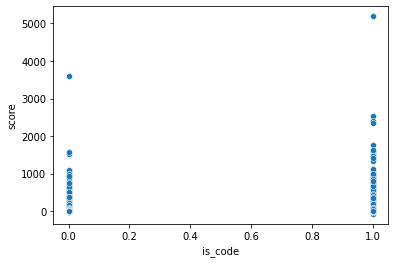

In [26]:
sns.scatterplot(x = df['is_code'],y = df['score'])

In [44]:
upvotes = [5,10,50,1000,1000,2000]
for vote in upvotes:
    print("Has Code ( votes above  {}) ==>".format(vote),len(df[(df['score'] > vote) & (df['is_code']==1)]))
    print("Does not have Code (votes above  {}) ==>".format(vote),len(df[(df['score'] > vote) & (df['is_code']==0)]))
    print()

Has Code ( votes above  5) ==> 10507
Does not have Code (votes above  5) ==> 9414

Has Code ( votes above  10) ==> 5915
Does not have Code (votes above  10) ==> 5107

Has Code ( votes above  50) ==> 1272
Does not have Code (votes above  50) ==> 892

Has Code ( votes above  1000) ==> 16
Does not have Code (votes above  1000) ==> 6

Has Code ( votes above  1000) ==> 16
Does not have Code (votes above  1000) ==> 6

Has Code ( votes above  2000) ==> 4
Does not have Code (votes above  2000) ==> 1



Having code does not make much of a diffrence to the score

In [15]:
X = df.drop('score',axis = 1)
y = df['score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
start = datetime.now()
vectorizer = TfidfVectorizer(min_df=0.00009, max_features=20000, smooth_idf=True, norm="l2", \
                             tokenizer = lambda x: x.split(), sublinear_tf=False, ngram_range=(1,3))
x_train_multilabel = vectorizer.fit_transform(X_train['question'])
x_test_multilabel = vectorizer.transform(X_test['question'])
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:00:34.354631


In [17]:
from sklearn.svm import SVR
clf  = SVR()

In [18]:
clf.fit(x_train_multilabel,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [19]:
y_pred = clf.predict(x_test_multilabel)

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [45]:
mean_squared_error(y_test,y_pred, squared= False)

43.29032441366408

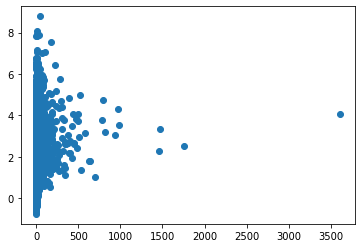

In [46]:
plt.scatter(y_test,y_pred)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


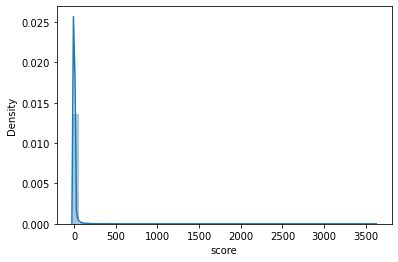

In [47]:
sns.distplot((y_test- y_pred),bins=50);

In [50]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 6.563335075563222
MSE: 1874.0521878402803
RMSE: 43.29032441366408
